In [1]:
!pip install -U pynwb
!pip install -U dandi
!pip install git+https://github.com/sytseng/ndx-harvey-swac.git

  Cloning https://github.com/sytseng/ndx-harvey-swac.git to c:\users\sergi\appdata\local\temp\pip-req-build-xfrtyehi
  Resolved https://github.com/sytseng/ndx-harvey-swac.git to commit c82b84cbf7c9d3e8c320c439dab3bf2fd48f0ae8
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sytseng/ndx-harvey-swac.git 'C:\Users\sergi\AppData\Local\Temp\pip-req-build-xfrtyehi'


In [4]:
# install other dependencies
import cebra
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from cebra import CEBRA
from scipy import interpolate
from pynwb import NWBHDF5IO
from ndx_harvey_swac import LabMetaDataSession

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline



In [6]:
!dandi download https://api.dandiarchive.org/api/assets/74ac947f-fb79-4e44-ac18-bad485bf7d22/download/

PATH                                                                                           SIZE      DONE    DONE% CHECKSUM STATUS  MESSAGE          
sub-9_ses-mouse-9-session-date-2017-08-19-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb                                  error   FileExistsError  
Summary:                                                                                       0 Bytes   0 Bytes                1 error 1 FileExistsError
                                                                                               +556.5 MB 0.00%                                           


2024-03-17 11:13:57,484 [    INFO] Logs saved in C:\Users\sergi\AppData\Local\dandi\dandi-cli\Logs\20240317151355Z-29172.log


In [7]:
filepath="C:\Code\Hackathon\sub-9_ses-mouse-9-session-date-2017-08-19-area-visA-L23-multi-plane-imaging_behavior+ophys.nwb"
io = NWBHDF5IO(filepath, 'r')
nwb = io.read()
nwb

c:\Users\sergi\miniconda3\envs\Python_ML\lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  return func(args[0], **pargs)
c:\Users\sergi\miniconda3\envs\Python_ML\lib\site-packages\hdmf\utils.py:668: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  return func(args[0], **pargs)


,ml,ap,depth,area,mTagBFP2,mScarlet,pixel_mask
id,,,,,,,
0,-1.83153,-1.67308,0.115,A,True,False,"[[483, 258, 91007.11], [482, 259, 157956.42], [483, 259, 247654.84], [484, 259, 175354.88], [481, 260, 169253.83], [482, 260, 328937.47], [483, 260, 380361.25], [484, 260, 342891.0], [485, 260, 156837.55], [480, 261, 139835.08], [481, 261, 320548.3], [482, 261, 328538.8], [483, 261, 284250.38], [484, 261, 272464.12], [485, 261, 263009.78], [486, 261, 114113.06], [479, 262, 130135.49], [480, 262, 350195.44], [481, 262, 344748.8], [482, 262, 263407.06], [483, 262, 228751.84], [484, 262, 207297.28], [485, 262, 223281.47], [486, 262, 214495.58], [479, 263, 270379.03], [480, 263, 450994.62], [481, 263, 325501.34], [482, 263, 261987.56], [483, 263, 233517.36], [484, 263, 214340.12], [485, 263, 202163.22], [486, 263, 230735.47], [479, 264, 326150.06], [480, 264, 476270.56], [481, 264, 333029.28], [482, 264, 265543.38], [483, 264, 236059.42], [484, 264, 218495.77], [485, 264, 204481.16], [486, 264, 268010.78], [487, 264, 129516.695], [478, 265, 109774.41], [479, 265, 310635.3], [480, 265, 478236.94], [481, 265, 377786.2], [482, 265, 281787.9], [483, 265, 253100.7], [484, 265, 228369.28], [485, 265, 223610.05], [486, 265, 330142.8], [487, 265, 157617.06], [479, 266, 166514.53], [480, 266, 430299.75], [481, 266, 460057.44], [482, 266, 308356.97], [483, 266, 276319.9], [484, 266, 262071.53], [485, 266, 282850.75], [486, 266, 351484.25], [480, 267, 223096.55], [481, 267, 472413.94], [482, 267, 400318.12], [483, 267, 341142.75], [484, 267, 350033.25], [485, 267, 394185.56], [486, 267, 239445.08], [481, 268, 215518.58], [482, 268, 379879.94], [483, 268, 439134.2], [484, 268, 445183.56], [485, 268, 331286.72], [482, 269, 100239.83], [483, 269, 223852.78], [484, 269, 204007.98]]"
1,-1.81635,-1.72861,0.115,A,False,True,"[[475, 217, 11779.721], [476, 217, 21893.092], [477, 217, 23192.68], [478, 217, 18077.207], [474, 218, 27621.184], [475, 218, 45044.8], [476, 218, 56738.1], [477, 218, 59457.008], [478, 218, 48369.43], [479, 218, 12665.242], [472, 219, 12816.762], [473, 219, 32254.629], [474, 219, 42073.28], [475, 219, 40477.832], [476, 219, 42192.938], [477, 219, 53071.88], [478, 219, 61973.242], [479, 219, 26224.95], [472, 220, 29170.098], [473, 220, 36263.19], [474, 220, 20734.17], [475, 220, 23104.074], [476, 220, 27555.078], [477, 220, 33960.977], [478, 220, 50999.695], [479, 220, 41034.797], [472, 221, 37479.72], [473, 221, 23905.121], [474, 221, 14156.272], [475, 221, 19098.836], [476, 221, 20715.451], [477, 221, 24270.803], [478, 221, 40262.656], [479, 221, 49374.586], [480, 221, 8807.097], [471, 222, 9034.222], [472, 222, 44253.723], [473, 222, 25068.469], [474, 222, 17174.328], [475, 222, 19703.775], [476, 222, 18325.326], [477, 222, 22856.584], [478, 222, 36802.316], [479, 222, 50652.03], [480, 222, 11847.38], [472, 223, 46447.465], [473, 223, 35605.07], [474, 223, 18739.86], [475, 223, 20567.977], [476, 223, 19826.758], [477, 223, 22451.738], [478, 223, 34963.312], [479, 223, 48713.07], [480, 223, 11620.417], [472, 224, 30984.92], [473, 224, 46513.94], [474, 224, 25852.896], [475, 224, 19138.723], [476, 224, 22233.225], [477, 224, 27827.264], [478, 224, 45244.23], [479, 224, 44777.91], [480, 224, 11101.3955], [472, 225, 9798.707], [473, 225, 42598.45], [474, 225, 43409.465], [475, 225, 34840.586], [476, 225, 36535.746], [477, 225, 42026.746], [478, 225, 45569.97], [479, 225, 33260.34], [480, 225, 8740.246], [473, 226, 15096.922], [474, 226, 31177.703], [475, 226, 39540.508], [476, 226, 38490.17], [477, 226, 33005.82], [478, 226, 24084.61], [479, 226, 17231.744], [475, 227, 17536.627], [476, 227, 11626.823]]"
2,-1.40609,-1.43519,0.115,A,False,False,"[[178, 405, 32037.309], [179, 405, 28367.28], [180, 405, 22740.55], [178, 406, 49287.418], [179, 406, 77518.414], [180, 406, 67876.07], [181, 406, 61937.824], [182, 406, 68309.266], [183, 406, 24239.715], [178, 407, 69871.7], [179, 407, 72018.234], [180, 407, 56953.594], [181, 407, 56053.12], 

In [8]:
imaging_timestamps_0 = nwb.processing['ophys']['deconvolved_activity_plane_0'].timestamps
deconv_0 = nwb.processing['ophys']['deconvolved_activity_plane_0'].data[:]
df_0 = nwb.processing['ophys']['df_over_f_plane_0']['dF_over_F_plane_0'].data[:]

imaging_timestamps_0.shape, deconv_0.shape, df_0.shape



((32496,), (32496, 224), (32496, 224))

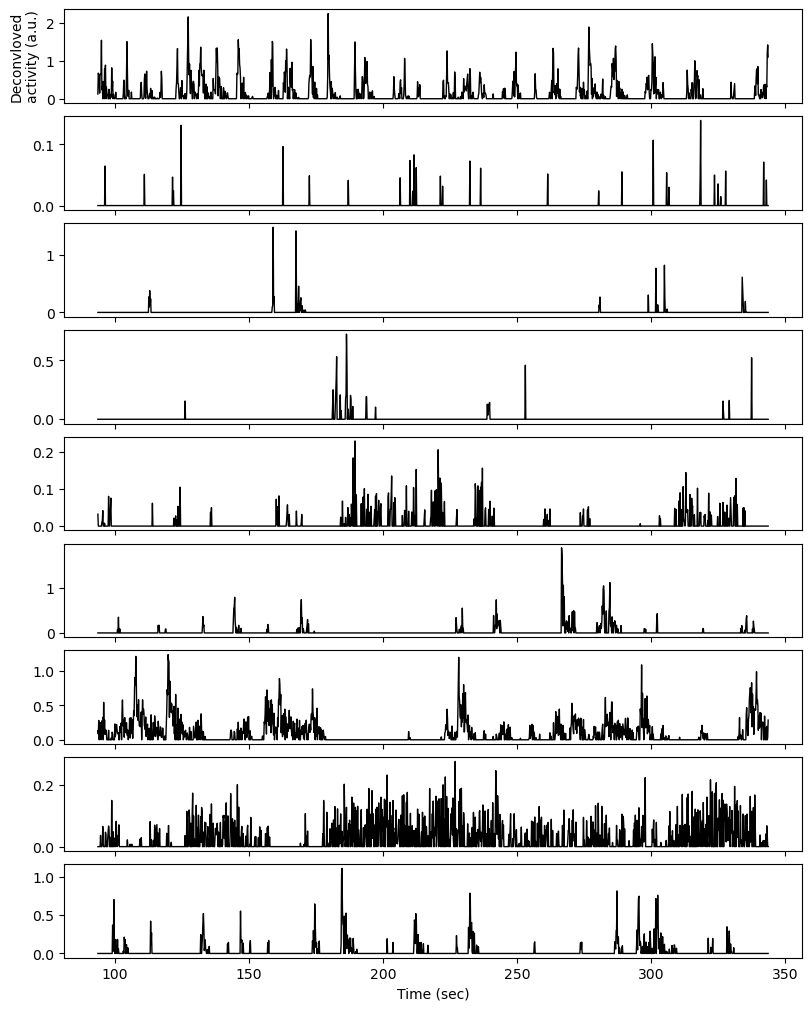

In [9]:
t_start = 500
t_end = 2000
f, ax = plt.subplots(9 , 1, figsize=(8, 10), constrained_layout=True)

for i_neuron in range(9):
    ax[i_neuron].plot(imaging_timestamps_0[t_start:t_end],deconv_0[t_start:t_end,i_neuron],'k',lw=1)
    if i_neuron == 8:
        ax[i_neuron].set(xlabel='Time (sec)')
    else:
        ax[i_neuron].set(xticklabels=[])
    if i_neuron == 0:
        ax[i_neuron].set(ylabel=f'Deconvloved\nactivity (a.u.)')

In [10]:
imaging_timestamps_0 = nwb.processing['ophys']['deconvolved_activity_plane_0'].timestamps
print(imaging_timestamps_0)

<HDF5 dataset "timestamps": shape (32496,), type "<f8">


In [11]:
nPlane = 0
imaging_frame_timestamps = nwb.processing['behavior']['frame_aligned_position']['frame_aligned_forward_and_lateral_position'].timestamps[:]
frame_aligned_position = nwb.processing['behavior']['frame_aligned_position']['frame_aligned_forward_and_lateral_position'].data[:]
frame_aligned_velocity = nwb.processing['behavior']['frame_aligned_velocity']['frame_aligned_pitch_roll_yaw_velocity'].data[:]
frame_aligned_trial_number = nwb.processing['behavior']['frame_aligned_trial_number'].data[:]
frame_aligned_time_from_choice_point = nwb.processing['behavior']['frame_aligned_time_from_choice_point'].data[:]
plane_idx_for_imaging_frames = nwb.processing['behavior']['plane_idx_for_imaging_frames'].data[:]

In [12]:
posF = frame_aligned_position[:,0]
posL = frame_aligned_position[:,1]


# get pitch, roll and yaw velocities
pitch = frame_aligned_velocity[:,0]
roll = frame_aligned_velocity[:,1]
yaw = frame_aligned_velocity[:,2]

In [26]:
frame_idx_0 = plane_idx_for_imaging_frames == nPlane
trial_number_0 = frame_aligned_trial_number[frame_idx_0]
posF_0 = posF[frame_idx_0]
posL_0 = posL[frame_idx_0]
positions_Y = np.vstack((posF_0, posL_0))

time_from_choice_point_0 = frame_aligned_time_from_choice_point[frame_idx_0]
table_0 = np.vstack((imaging_timestamps_0,trial_number_0, posF_0, posL_0, time_from_choice_point_0, deconv_0.T))
table_to_filter = np.vstack((imaging_timestamps_0,posF_0, posL_0,deconv_0.T))

frame_idx_0.shape, trial_number_0.shape, posF_0.shape, time_from_choice_point_0.shape, table_0.shape


((162480,), (32496,), (32496,), (32496,), (229, 32496))

In [29]:
table_frame_df = pd.DataFrame(table_to_filter.T)
df_no_nan = table_frame_df.dropna()

In [14]:
table_frame =pd.DataFrame(table_0.T)



In [15]:
table_frame

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,228
0,10.3140,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,10.4810,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.101311,...,0.0,0.000000,0.442094,0.000000,0.000000,0.033873,0.000000,0.0,0.0,0.0
2,10.6475,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.174737,0.081776,0.000000,0.000000,0.032608,0.0,0.0,0.0
3,10.8145,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,10.9810,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.000000,0.007482,0.000000,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32491,5429.3280,409.0,NaN,NaN,6.5760,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.119468,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
32492,5429.4950,409.0,NaN,NaN,6.7430,0.0,0.0,0.0,0.00000,0.000000,...,0.0,0.000000,0.403001,0.075566,0.266218,0.077985,0.000000,0.0,0.0,0.0
32493,5429.6620,409.0,NaN,NaN,6.9100,0.0,0.0,0.0,0.00000,0.069372,...,0.0,0.000000,0.000000,0.000000,0.576325,0.000000,0.000000,0.0,0.0,0.0
32494,5429.8285,409.0,NaN,NaN,7.0765,0.0,0.0,0.0,3.79154,0.000000,...,0.0,0.000000,0.384822,0.065014,0.156580,0.000000,0.000000,0.0,0.0,0.0


In [16]:
# First you define the parameter to explore. Here we explore the output dimension, learning rate, time offset, and model num_hidden_units.
params_grid = dict(
    output_dimension = [16, 32, 64, 128],
    learning_rate = [0.001, 0.01, 0.0003],
    time_offsets = [10, 20],
    model_architecture='offset10-model',
    batch_size=512,
    temperature_mode='constant',
    max_iterations=[1000], # we initially set this low to limit computation and will increase it later to fully train the best model
    distance='cosine',
    conditional='time',
    device='cuda_if_available',
    num_hidden_units = [32, 64, 128],
    temperature=1,
    verbose = True)

# we construct the input data
datasets = {"dataset1": deconv_0} # a different set of data

# we run the grid search
grid_search = cebra.grid_search.GridSearch()
grid_search.fit_models(datasets=datasets, params=params_grid, models_dir="saved_models")

c:\Users\sergi\miniconda3\envs\Python_ML\lib\site-packages\cebra\__init__.py:118: UserWarning: Your code triggered a lazy import of cebra.grid_search. While this will (likely) work, it is recommended to add an explicit import statement to you code instead. To disable this warning, you can run ``cebra.allow_lazy_imports()``.
  warnings.warn(
pos: -0.9097 neg:  6.3522 total:  5.4425 temperature:  1.0000: 100%|██████████| 1000/1000 [00:12<00:00, 82.74it/s]
pos: -0.8966 neg:  6.3772 total:  5.4805 temperature:  1.0000:  76%|███████▋  | 765/1000 [00:08<00:02, 91.01it/s]


KeyboardInterrupt: 

In [17]:
df_results = grid_search.get_df_results(models_dir="saved_models")
best_model, best_model_name = grid_search.get_best_model(dataset_name="dataset1", models_dir="saved_models")

In [ ]:
# Get all the final losses
pd_loss = grid_search.get_df_results()

# Plot the losses for each parameter combination in a bar plot
# The y-axis is the parameter combination and the x-axis is the loss
# We combine the parameters into a single string for the x-axis
pd_loss['params'] = pd_loss['learning_rate'].astype(str) + '_' + pd_loss['num_hidden_units'].astype(str) + '_' + pd_loss['output_dimension'].astype(str) + '_' + pd_loss['time_offsets'].astype(str)
pd_loss_sorted = pd_loss.sort_values(by='loss', ascending=False)
pd_loss_sorted.plot.barh(x='params', y='loss', figsize=(10, 20))

# We turn off the legend from the plot
plt.gca().legend_.remove()

In [17]:
best_model

CEBRA(batch_size=512, conditional='time', learning_rate=0.01,
      max_iterations=1000, model_architecture='offset10-model',
      num_hidden_units=128, output_dimension=16, temperature=1, time_offsets=10,
      verbose=True)

In [18]:
# alter the number of max_iterations to get a faster runtime
max_iterations = 5000 # default is 5000

In [52]:
# set conditional to 'time'
cebra_time_model = CEBRA(batch_size=512, conditional='time', learning_rate=0.01,
      max_iterations=1000, model_architecture='offset10-model',
      num_hidden_units=128, output_dimension=2, temperature=1, time_offsets=10,
      verbose=True)

In [53]:

df_no_nan



,0,1,2,3,4,5,6,7,8,9,...,217,218,219,220,221,222,223,224,225,226
119,30.1610,0.100000,0.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
120,30.3275,0.166178,4.052250e-18,0.000000,0.0,0.0,0.059609,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.065953,0.000000,0.0,0.0,0.000000,0.0,0.0
121,30.4945,0.221715,7.452919e-18,0.000000,0.0,0.0,0.095641,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.272657,0.0,0.0
122,30.6610,0.254950,9.487978e-18,0.000000,0.0,0.0,0.194611,0.0,0.0,0.000000,...,0.0,0.0,0.18679,0.105742,0.000000,0.0,0.0,0.000000,0.0,0.0
123,30.8280,0.300601,1.228326e-17,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.00000,0.000000,0.135504,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32447,5421.9895,2.107026,-4.112215e-02,0.033748,0.0,0.0,0.000000,0.0,0.0,0.272387,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
32448,5422.1565,2.200103,-7.842472e-02,0.072146,0.0,0.0,0.000000,0.0,0.0,0.026720,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
32449,5422.3230,2.301910,-1.171236e-01,0.022074,0.0,0.0,0.000000,0.0,0.0,0.120036,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
32450,5422.4900,2.404776,-1.590411e-01,0.009518,0.0,0.0,0.000000,0.0,0.0,0.250097,...,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0


In [54]:
cutoff = int(0.9 * len(df_no_nan))

first_90_percent = df_no_nan.iloc[:cutoff]
last_10_percent = df_no_nan.iloc[cutoff:]

In [77]:
timestamp_test =last_10_percent.iloc[:,0].values
timestamp_test

array([4862.419 , 4862.586 , 4862.7525, ..., 5422.323 , 5422.49  ,
       5422.6565])

In [61]:
numpy_array_Y = first_90_percent.iloc[:, 1:3].values
numpy_array_Y_test = last_10_percent.iloc[:, 1:3].values
numpy_array_Y

array([[1.00000000e-01, 0.00000000e+00],
       [1.66178265e-01, 4.05225002e-18],
       [2.21715404e-01, 7.45291897e-18],
       ...,
       [1.34387474e-01, 2.10562550e-18],
       [1.50260243e-01, 3.07755228e-18],
       [1.63588132e-01, 3.89365010e-18]])

In [56]:
numpy_array_X = first_90_percent.iloc[:,3:].values
numpy_array_X_test = last_10_percent.iloc[:,3:].values

numpy_array_X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.27265698, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [57]:

cebra_time_model.fit(numpy_array_X, numpy_array_Y )
cebra_time_model.save("cebra_time_model_withY.pt")
numpy_array_Y.shape

pos: -0.3989 neg:  6.7370 total:  6.3381 temperature:  1.0000:   0%|          | 0/1000 [00:00<?, ?it/s]

pos: -0.9852 neg:  6.4745 total:  5.4893 temperature:  1.0000: 100%|██████████| 1000/1000 [00:15<00:00, 63.75it/s]


(16534, 2)

<Axes: xlabel='Steps', ylabel='InfoNCE Loss'>

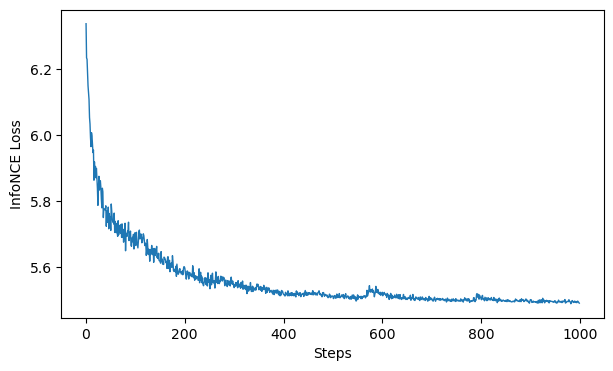

In [58]:
# this plots the loss from the model we saved in the previous cell
cebra.plot_loss(cebra_time_model, color = 'tab:blue')

In [63]:
loaded_cebra_model = cebra.CEBRA.load("cebra_time_model_withY.pt")

y_output = loaded_cebra_model.transform(numpy_array_X_test)




In [85]:
import torch
from torch.nn import MSELoss

# Convert the numpy arrays to PyTorch tensors
tensor_Y_test = torch.from_numpy(numpy_array_Y_test)
tensor_y_output = torch.from_numpy(y_output)

# Create a loss function instance
loss_fn = MSELoss()

# Compute the loss for the predictions
loss = loss_fn(tensor_Y_test, tensor_y_output)

print(loss)

tensor(1.4802, dtype=torch.float64)


In [74]:
timestamp_test.shape, numpy_array_Y_test.shape

((1838,), (1838, 2))

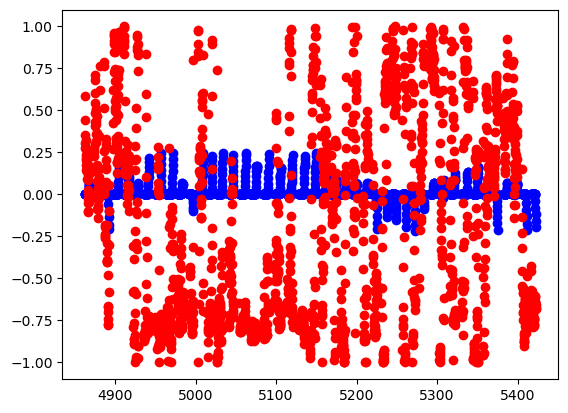

In [90]:
import matplotlib.pyplot as plt

# Assuming numpy_array_Y_test is your numpy array

# Create a new figure
plt.figure()

timestamp_test.shape
numpy_array_Y_test.shape
# Plot the array
plt.scatter(timestamp_test.T,numpy_array_Y_test.T[1]/4, color = "blue")
plt.scatter(timestamp_test,y_output[:,1], color = "red")
plt.legend

# Display the plot
plt.show()

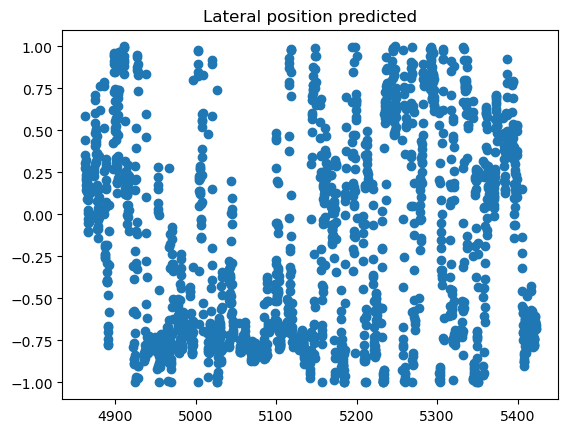

In [87]:
import matplotlib.pyplot as plt

# Assuming numpy_array_Y_test is your numpy array

# Create a new figure
plt.figure()

# Plot the array
plt.scatter(timestamp_test,y_output[:,1])
plt.title("Lateral position predicted")

# Display the plot
plt.show()